In [180]:
%matplotlib inline

import pybedtools
from clipper.src import CLIP_analysis
from gscripts.general import region_helpers

import os
from gscripts.general import dataviz
from matplotlib_venn import venn2
import glob
import os
import numpy as np
import pandas as pd

img_dir = "/home/gpratt/Dropbox/random_figure/"

In [7]:
%load_ext autoreload
%autoreload 2

reload(CLIP_analysis)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'clipper.src.CLIP_analysis' from '/home/gpratt/clipper/clipper/src/CLIP_analysis.py'>

In [213]:
def make_clipper_ish(interval):
    interval.name = interval[7]
    interval[6] = interval.start
    interval[7] = interval.stop
    return interval

def filter_data(interval):
    #col4 is -log10 p-val
    #col5 is -log2 fold enrichment
    return (float(interval[4]) >= 3) and (float(interval[3]) >= 5)

In [ ]:
gene_id_to_name = region_helpers.gene_id_to_name("/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db")
gene_id_to_type = region_helpers.gene_id_to_type("/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db")
ensembl_id_to_name = {key.split(".")[0]: value for key, value in gene_id_to_name.items()}

name_to_gene_id = {value: key for key, value in gene_id_to_name.items()}

In [67]:
inputnorm_dir = '/home/bay001/projects/parp13_ago2_20151203/data/input_norm'
wt = pybedtools.BedTool(os.path.join(inputnorm_dir,'SA2_01.basedon_SA2_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'))
mimic = pybedtools.BedTool(os.path.join(inputnorm_dir,'SA4_01.basedon_SA4_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'))
ko = pybedtools.BedTool(os.path.join(inputnorm_dir,'SA6_01.basedon_SA6_01.peaks.l2inputnormnew.bed.compressed.bed'))

In [84]:
len(wt.filter(filter_data)), len(mimic.filter(filter_data)), len(ko.filter(filter_data))

(157, 307, 517)

In [72]:
wt_cleaned = wt.intersect(ko, v=True, s=True).filter(filter_data).saveas("SA2_01.basedon_SA2_01.peaks.l2inputnormnew.bed.compressed.bed.annotated")
mimic_cleaned = mimic.intersect(ko, v=True, s=True).filter(filter_data).saveas("SA4_01.basedon_SA4_01.peaks.l2inputnormnew.bed.compressed.bed.annotated")

In [190]:
len(mimic_cleaned.intersect(wt_cleaned, s=True, u=True)), len(wt_cleaned.intersect(mimic_cleaned, s=True, u=True))

0

In [206]:
diff_exp_parp = pd.concat({os.path.basename(item.split(".")[0]): pd.read_csv(item, index_col=0) for item in glob.glob("/home/gpratt/ad-hoc/*.csv")})
sig_diff_exp_parp = diff_exp_parp[(diff_exp_parp.padj < .05) & (np.abs(np.power(diff_exp_parp.log2FoldChange, 2)) > 1.5)]
#sig_diff_exp_parp = diff_exp_parp[(diff_exp_parp.padj < .05)]

In [207]:
sig_diff_exp_parp.groupby(level=0).count()

,Gencode V19,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_name
ko_vs_wt_3p-ssRNA_diffexp_gene_name,469,469,469,469,469,469,469,331
ko_vs_wt_ssRNA_diffexp_gene_name,427,427,427,427,427,427,427,305
ss_vs_3p_ko_diffexp_gene_name,64,64,64,64,64,64,64,42
ss_vs_3p_wt_diffexp_gene_name,103,103,103,103,103,103,103,68


In [208]:
sig_diff_exp_parp[sig_diff_exp_parp.log2FoldChange > 0].groupby(level=0).count()

,Gencode V19,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_name
ko_vs_wt_3p-ssRNA_diffexp_gene_name,191,191,191,191,191,191,191,139
ko_vs_wt_ssRNA_diffexp_gene_name,190,190,190,190,190,190,190,136
ss_vs_3p_ko_diffexp_gene_name,64,64,64,64,64,64,64,42
ss_vs_3p_wt_diffexp_gene_name,103,103,103,103,103,103,103,68


In [209]:
sig_diff_exp_parp[sig_diff_exp_parp.log2FoldChange < 0].groupby(level=0).count()

,Gencode V19,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_name
ko_vs_wt_3p-ssRNA_diffexp_gene_name,278,278,278,278,278,278,278,192
ko_vs_wt_ssRNA_diffexp_gene_name,237,237,237,237,237,237,237,169


In [212]:
diff_exp_parp[diff_exp_parp.Gene_name == "IFIT2"]

,,Gencode V19,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_name
,Ensembl,,,,,,,,
ko_vs_wt_3p-ssRNA_diffexp_gene_name,ENSG00000119922,ENSG00000119922.7,26344.143902,-1.032045,0.222075,-4.647274,3.363509e-06,1.621211e-04,IFIT2
ko_vs_wt_ssRNA_diffexp_gene_name,ENSG00000119922,ENSG00000119922.7,34.414440,-0.737931,0.325009,-2.270493,2.317771e-02,7.193661e-02,IFIT2
ss_vs_3p_ko_diffexp_gene_name,ENSG00000119922,ENSG00000119922.7,8939.443919,5.878435,0.105081,55.942124,0.000000e+00,0.000000e+00,IFIT2
ss_vs_3p_wt_diffexp_gene_name,ENSG00000119922,ENSG00000119922.7,18502.431263,5.910270,0.180191,32.799972,5.893599e-236,2.043142e-232,IFIT2


In [ ]:
# overlappning targets
foo = set([gene_id_to_name[interval[-1]] for interval in wt_cleaned])
bar = set([gene_id_to_name[interval[-1].split("|")[0]] for interval in mimic_cleaned])
print foo & bar

WT vs ko_vs_wt_3p-ssRNA_diffexp_gene_name
IFIT2, FANCB, NEAT1, PTPRU, XIST
mock vs ko_vs_wt_3p-ssRNA_diffexp_gene_name
HNRNPA0, CUL4B, PMAIP1, CCL5, HLA-B, SDC4, FOXC1, IFIT2, SAP18, MIDN, ZBTB10, RSAD2, ARL6IP1, NEAT1, ZNF428, HIC1
WT vs ko_vs_wt_ssRNA_diffexp_gene_name
PABPN1, FBRSL1, SPIDR, TNRC6B, PTPRU, FANCB, ZNF431, NEAT1, UBE3C
mock vs ko_vs_wt_ssRNA_diffexp_gene_name
CBS, H1FX, CANX, PHF6, SYNE2, H1F0, KMT2A, TNPO2, MRPL37, CDV3, ATP6AP2, STAG2, MYCBP2, AMOT, SQSTM1, JMJD8, HOXB3, NEAT1, HIST1H4H, RPS21, EIF1, PLS3, HIC1, UBE2J2, SELO, FOXC1, SAP18, MIDN, ZBTB10, UBA1, SFPQ, SLC27A4, APP, HNRNPA0, PMAIP1, HLA-B, DZIP1, ZNF703, ZNF787, LSM14B
WT vs ss_vs_3p_ko_diffexp_gene_name
IFIT2
mock vs ss_vs_3p_ko_diffexp_gene_name
CUL4B, CCL5, HLA-B, IFIT2, RSAD2, UBFD1
WT vs ss_vs_3p_wt_diffexp_gene_name
IFIT2
mock vs ss_vs_3p_wt_diffexp_gene_name
CUL4B, PMAIP1, CCL5, HLA-B, IFIT2, SDC4, RSAD2


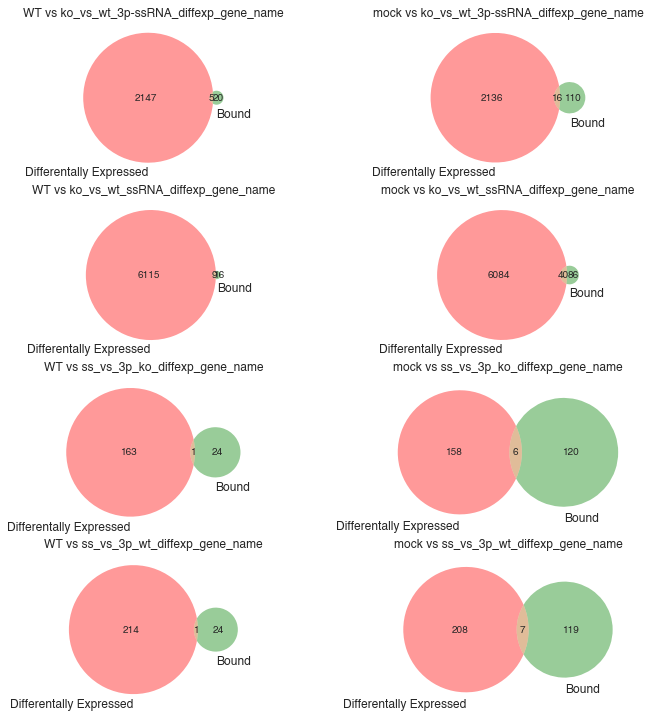

In [203]:
count = 0
with dataviz.Figure(os.path.join(img_dir, "de_vs_binding_parp.svg"), figsize=(10, 10)) as fig:
    
    for x, (name, df) in enumerate(sig_diff_exp_parp.groupby(level=0)):
        count += 1
        ax = fig.add_subplot(4,2,count)

        venn2([set(df['Gencode V19'].values), set([interval[-1] for interval in wt_cleaned])],
           set_labels =("Differentally Expressed", "Bound"),
               ax=ax
               

          )
        
        print "WT vs {}".format(name)
        print ", ".join([gene_id_to_name[item] for item in set(df['Gencode V19'].values) & set([interval[-1] for interval in wt_cleaned])])
        ax.set_title("WT vs {}".format(name), fontsize=12)
        count += 1
        ax = fig.add_subplot(4,2,count)

        venn2([set(df['Gencode V19'].values), set([interval[-1] for interval in mimic_cleaned])],
           set_labels =("Differentally Expressed", "Bound"),
              ax=ax
    )
        ax.set_title("mock vs {}".format(name), fontsize=12)
        
        print "mock vs {}".format(name)
        print ", ".join([gene_id_to_name[item] for item in set(df['Gencode V19'].values) & set([interval[-1] for interval in mimic_cleaned])])

Send Anthony and co overlapping genes for DE and binding

In [77]:
wt_cleaned.each(make_clipper_ish).saveas(os.path.basename(wt_cleaned.fn) + ".clipper")
mimic_cleaned.each(make_clipper_ish).saveas(os.path.basename(mimic_cleaned.fn) + ".clipper")

<BedTool(SA4_01.basedon_SA4_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.clipper)>

In [ ]:
clip_analysis  '--clusters' '/home/gpratt/ipython_notebook/SA2_01.basedon_SA2_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.clipper'  '-s' 'hg19_v19'  '--bam' '/projects/ps-yeolab/encode/analysis/encode_v13/SA2_WT_SS_PARP_PARP.merged.r2.bam'  '--AS_Structure' '/projects/ps-yeolab/genomes/hg19/hg19data4'  '--genome_location' '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'  '--phastcons_location' '/projects/ps-yeolab/genomes/hg19/hg19_phastcons.bw'  '--nrand' '3'  '--runPhast'  '--metrics' 'SA4.metrics'  '--gff_db' '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'

In [ ]:
clip_analysis  '--clusters' '/home/gpratt/ipython_notebook/SA4_01.basedon_SA4_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.clipper'  '-s' 'hg19_v19'  '--bam' '/projectencode/analysis/encode_v13/SA4_WT_3P_PARP_PARP.merged.r2.bam'  '--AS_Structure' '/projects/ps-yeolab/genomes/hg19/hg19data4'  '--genome_location' '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'  'location' '/projects/ps-yeolab/genomes/hg19/hg19_phastcons.bw'  '--nrand' '3'  '--runPhast'  '--metrics' 'rbfox2.metrics'  '--gff_db' '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotationSA4.metrics'  '--gff_db' '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'


In [214]:
bedtool.slop(b=50)

In [216]:
bedtool = pybedtools.BedTool("/home/elvannostrand/data/clip/CLIPseq_analysis/ALLCLIP_v12_20160112/EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.annotated_test")
bedtool = bedtool.slop(b=50, g="/projects/ps-yeolab/genomes/hg19/hg19.chrom.sizes").filter(filter_data).each(make_clipper_ish).saveas("EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.clipper")

clip_analysis  '--clusters' 'EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.clipper'  '-s' 'hg19_v19'  '--bam' '/projects/ps-yeolab2/encode/analysis/enco2_H1ES_1to25_RBFOX2.merged.r2.bam'  '--AS_Structure' '/projects/ps-yeolab/genomes/hg19/hg19data4'  '--genome_location' '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'  '--phastcons_location' '/prolab/genomes/hg19/hg19_phastcons.bw'  '--nrand' '3'  '--runPhast'  '--metrics' 'rbfox2.metrics'  '--gff_db' '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'